# CatBoost
**Student Name:** Ashraful Islam Tanzil  
**ID:** 0112230028

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
df = pd.read_csv('../../dataset/ENSEMBLE_LEARNING/adult.csv')
df = df.dropna()

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

X = df[numeric_cols].copy()

for col in categorical_cols:
    if col in df.columns:
        le_temp = LabelEncoder()
        X[col] = le_temp.fit_transform(df[col].astype(str))

target_col = df.columns[-1]
if target_col in X.columns:
    X = X.drop(columns=[target_col])

y = df[target_col].copy()
le_target = LabelEncoder()
y = le_target.fit_transform(y.astype(str))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f'Training shape: {X_train.shape}')

Training shape: (26048, 14)


C:\Users\Tanzil\AppData\Local\Temp\ipykernel_3104\3762153738.py:5: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


In [3]:
cat = CatBoostClassifier(
    iterations=100,
    random_state=42,
    verbose=False
)
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.4f}')
print(f'\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8727

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4976
           1       0.79      0.63      0.70      1537

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513



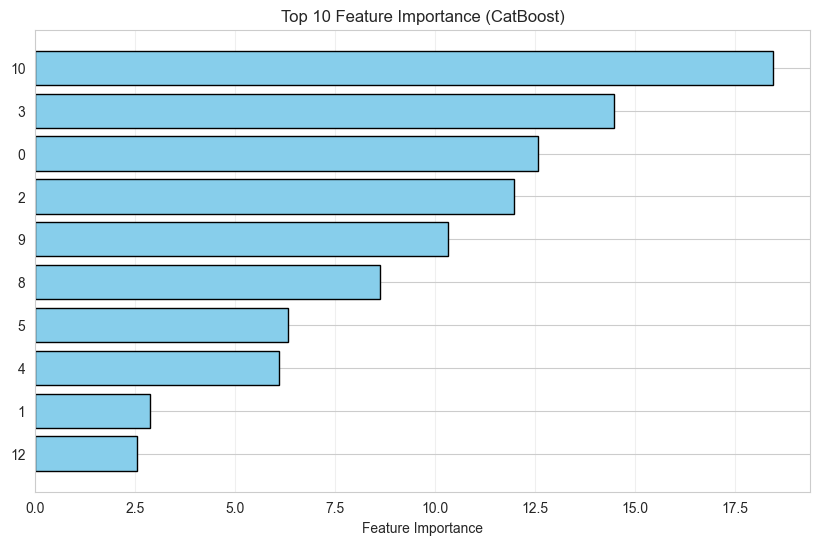

In [4]:
feature_importance = cat.get_feature_importance()
top_indices = np.argsort(feature_importance)[-10:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_indices)), feature_importance[top_indices], color='skyblue', edgecolor='black')
plt.yticks(range(len(top_indices)), top_indices)
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance (CatBoost)')
plt.grid(alpha=0.3, axis='x')
plt.show()